In [2]:
#Importando librerias
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Cargando datos usuarios
df_usuarios = pd.read_csv(r'C:/Users/alex_\Downloads/usuarios_datos_limpios.csv')
df_usuarios

,Unnamed: 0,id_persona,nombre,apellido,edad,genero,ciudad_residencia,estrato_socioeconomico,frecuencia_visita,promedio_gasto_comida,ocio,consume_licor,preferencias_alimenticias,membresia_premium,telefono_contacto,correo_electronico,tipo_de_pago_mas_usado,ingresos_mensuales
0,0,2550327378,Jackson,Gomez,31.0,Masculino,Miami,Alto,6,67.51,Sí,No,Vegetariano,Sí,(830)220-1926,NaN,Efectivo,6425
1,1,9446112038,Samantha,Soto,40.0,Femenino,Denver,Medio,2,44.92,Sí,Sí,Mariscos,No,881-476-1426,NaN,Efectivo,2374
2,2,3098363243,Terry,Adams,62.0,Femenino,Denver,Bajo,2,9.24,Sí,Sí,Vegetariano,No,NaN,diana74@example.net,Efectivo,1110
3,3,4013002847,James,Shannon,41.0,Masculino,Boston,Alto,5,30.74,Sí,Sí,Carnes,Sí,NaN,scottfrey@example.com,Tarjeta,6931
4,5,1291749568,Donna,Davis,26.0,Femenino,Dallas,Alto,6,52.47,No,Sí,Carnes,Sí,976.606.6259x578,daniel28@example.com,Efectivo,8545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28532,29995,4862097674,Robert,Cortez,20.0,Masculino,Houston,Alto,-3,30.82,Sí,Sí,Vegano,Sí,NaN,garciagregory@example.net,Tarjeta,5781
28533,29996,9458262482,Michael,Holt,78.0,Masculino,Denver,Alto,5,45.04,No,No,Mariscos,No,NaN,jimmy77@example.org,Efectivo,7652
28534,29997,3412365931,Rebecca,Henry,77.0,Femenino,San Diego,Muy Alto,7,93.55,No,Sí,Mariscos,Sí,NaN,NaN,Efectivo,12639
28535,29998,8853079811,Tamara,Griffin,77.0,Femenino,Chicago,Bajo,1,6.18,Sí,No,Otro,No,(243)658-6543x11668,NaN,Tarjeta,1057


In [4]:
estrato_usuarios= df_usuarios.groupby(['estrato_socioeconomico'])['promedio_gasto_comida'].mean().sort_values(ascending=False)
print(estrato_usuarios)
frecuencia_cal = df_usuarios.groupby('estrato_socioeconomico')[['frecuencia_visita', 'promedio_gasto_comida']].mean()
genero_usuarios = df_usuarios.groupby('nombre')[['promedio_gasto_comida','ingresos_mensuales']].mean()
gasto_cal =df_usuarios.groupby(['ciudad_residencia'])['promedio_gasto_comida'].mean()

estrato_socioeconomico
Muy Alto    64.316993
Alto        38.152283
Medio       24.324215
Bajo        11.782087
Name: promedio_gasto_comida, dtype: float64


C:\Users\alex_\AppData\Local\Temp\ipykernel_20724\297453188.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(gasto_cal.index, rotation=45)


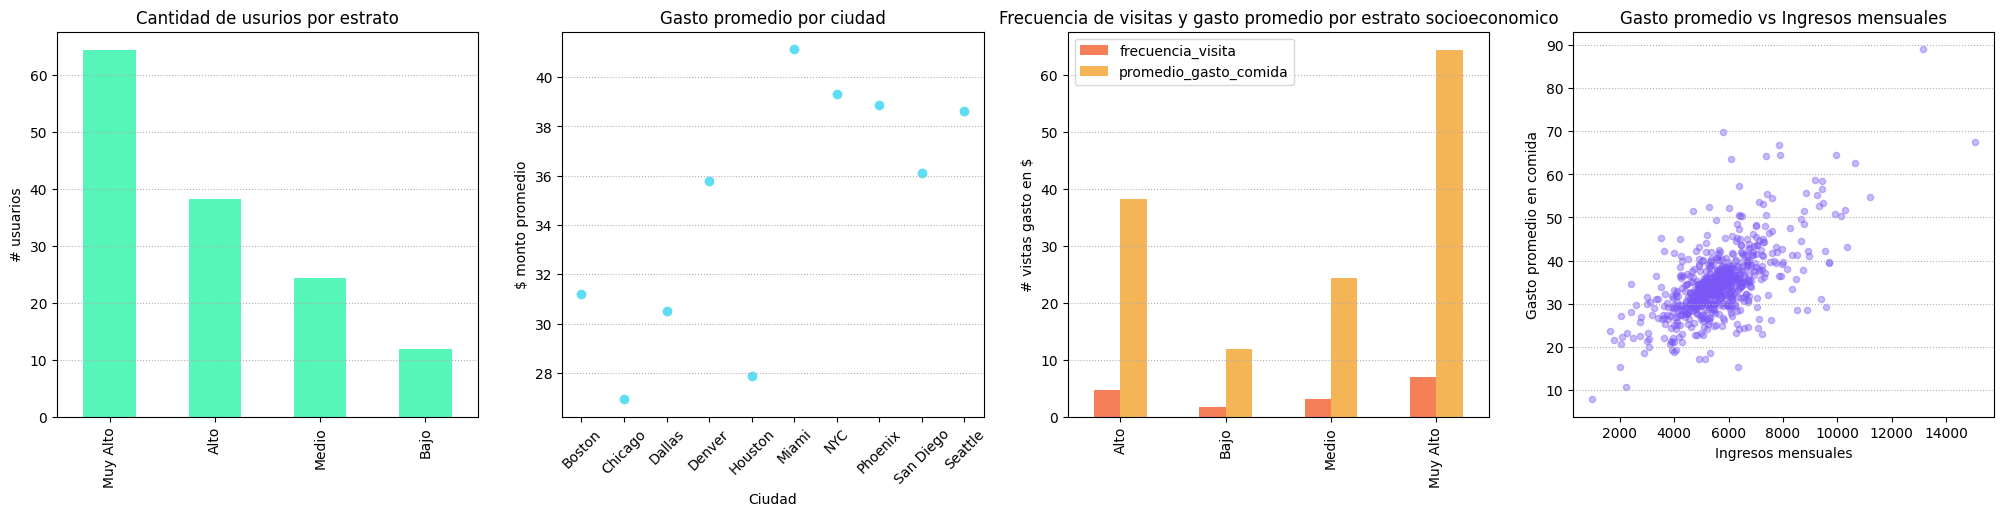

In [8]:
#graficos representativos de los datos obtenidos del dataset limpio
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(25, 5))
# 'Gasto promedio vs Ingresos mensuales' (scatter plot)
genero_usuarios.plot(kind='scatter', x='ingresos_mensuales', y='promedio_gasto_comida', color='#7956F5', alpha = 0.4, ax=ax4)
ax4.set_title('Gasto promedio vs Ingresos mensuales')
ax4.set_xlabel('Ingresos mensuales')
ax4.set_ylabel('Gasto promedio en comida')
ax4.grid(axis='y', linestyle=':')
#ax4.alpha(0.1)
#usuarios por estrato
estrato_usuarios.plot(kind='bar', color='#56F5B9', ax=ax1)
ax1.set_title('Cantidad de usurios por estrato')
ax1.set_xlabel('')
ax1.set_ylabel('# usuarios')
ax1.grid(axis='y', linestyle=':')
#Frecuencia de visitas y gasto promedio por estrato socioeconomico
frecuencia_cal.plot(kind='bar', color=['#F57F56', '#F5B556'], ax=ax3)
ax3.set_title('Frecuencia de visitas y gasto promedio por estrato socioeconomico')
ax3.set_xlabel('')
ax3.set_ylabel('# vistas gasto en $')
ax3.grid(axis='y', linestyle=':')
# gasto promedio por ciudad (scatter plot)
ax2.scatter(gasto_cal.index, gasto_cal.values, color='#5EDEF2')
ax2.set_title('Gasto promedio por ciudad')
ax2.set_xlabel('Ciudad')
ax2.set_ylabel('$ monto promedio')
ax2.grid(axis='y', linestyle=':')
ax2.set_xticklabels(gasto_cal.index, rotation=45)
plt.show()

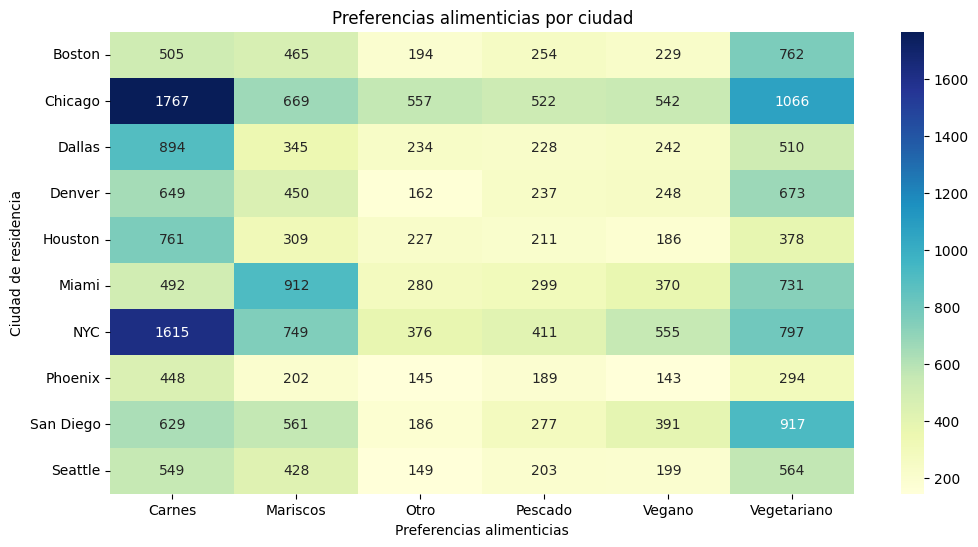

In [ ]:
preferencias_df = preferencias_ciudad.reset_index(name='count')

pivot = preferencias_df.pivot(index='ciudad_residencia', columns='preferencias_alimenticias', values='count')
plt.figure(figsize=(12, 6))
sns.heatmap(pivot, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Preferencias alimenticias por ciudad')
plt.ylabel('Ciudad de residencia')
plt.xlabel('Preferencias alimenticias')
plt.show()

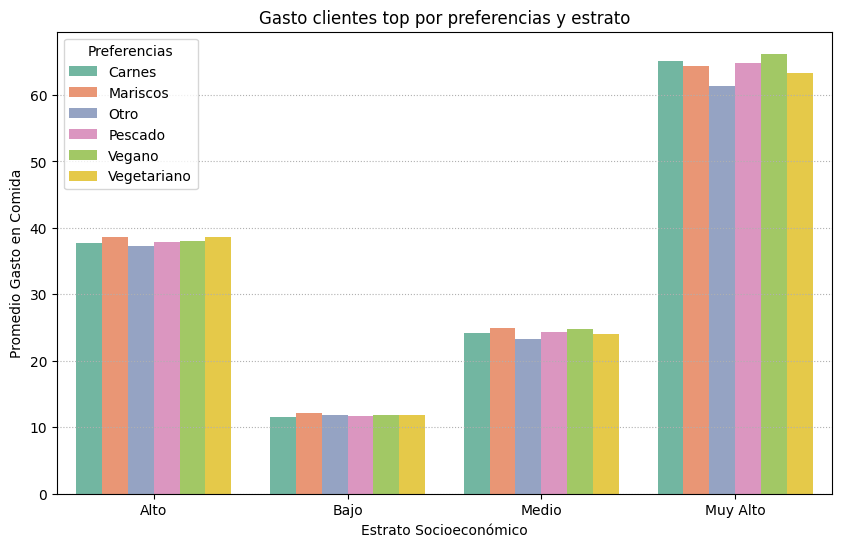

In [ ]:
gustos_clientes_top_df = df_usuarios.groupby(['preferencias_alimenticias','estrato_socioeconomico'])['promedio_gasto_comida'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(
	data=gustos_clientes_top_df,
	x='estrato_socioeconomico',
	y='promedio_gasto_comida',
	hue='preferencias_alimenticias',
	palette='Set2'
)
plt.title('Gasto clientes top por preferencias y estrato')
plt.xlabel('Estrato Socioeconómico')
plt.ylabel('Promedio Gasto en Comida')
plt.grid(axis='y', linestyle=':')
plt.legend(title='Preferencias')
plt.show()


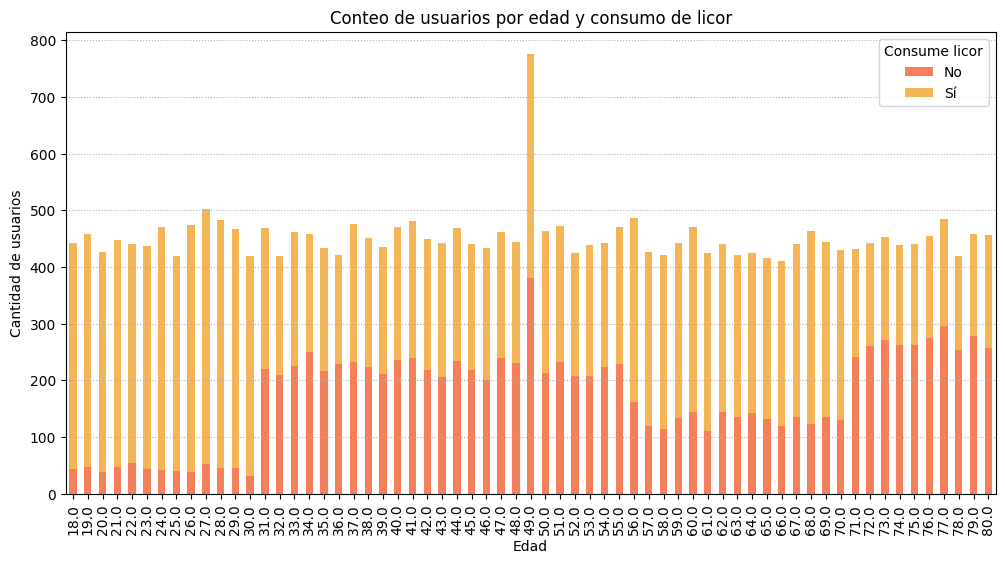

In [ ]:
# Contar cuántos usuarios de cada edad consumen o no licor
conteo_edades_licor = df_usuarios.groupby(['edad', 'consume_licor']).size().unstack(fill_value=0)

conteo_edades_licor.plot(kind='bar', stacked=True, figsize=(12,6), color=['#F57F56', '#F5B556'])
plt.title('Conteo de usuarios por edad y consumo de licor')
plt.xlabel('Edad')
plt.ylabel('Cantidad de usuarios')
plt.grid(axis='y', linestyle=':')
plt.legend(title='Consume licor')
plt.show()

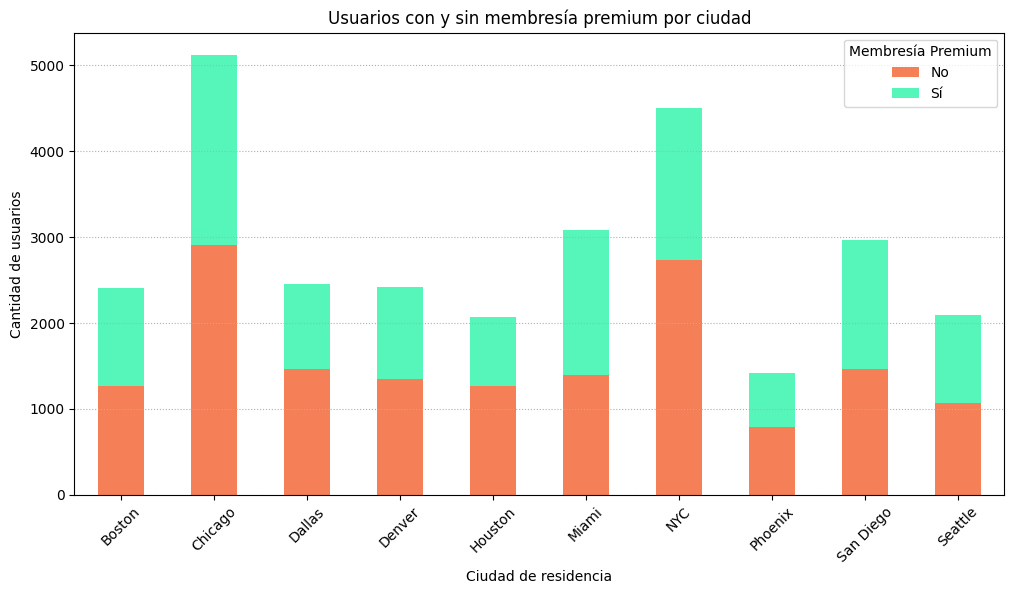

In [ ]:
# Contar el número de usuarios con y sin membresía premium por ciudad
membresias_ciudad = df_usuarios.groupby(['ciudad_residencia', 'membresia_premium']).size().unstack(fill_value=0)

# Graficar
membresias_ciudad.plot(kind='bar', stacked=True, figsize=(12,6), color=['#F57F56', '#56F5B9'])
plt.title('Usuarios con y sin membresía premium por ciudad')
plt.xlabel('Ciudad de residencia')
plt.ylabel('Cantidad de usuarios')
plt.grid(axis='y', linestyle=':')
plt.legend(title='Membresía Premium')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Cargando datos restaurantes
df_restaurantes = pd.read_csv('C:/Users/alex_\Downloads/restaurantes_miami_datos_limpios.csv')
df_restaurantes

,Unnamed: 0,alias,title,business_id,business_alias,business_name,business_price,business_rating,business_review_count,business_distance,business_coordinates_latitude,business_coordinates_longitude,business_location_address1,business_location_city,types,top_restaurant_per_title
0,0,asianfusion,Asian Fusion,K3ukx2e11xTRtYBU01dmrA,salty-flame-miami,Salty Flame,sin dato,4.4,198,9568.050891,25.760220,-80.192670,1414 Brickell Ave,Miami,"Asian Fusion, Steakhouses, Cocktail Bars",True
1,3,cuban,Cuban,UXHxLN3DcDGI57uDIfCuJA,olds-havana-cuban-bar-and-cocina-miami,Old's Havana Cuban Bar & Cocina,$$,4.4,3012,7035.905420,25.765594,-80.219238,1442 SW 8th St,Miami,"Cuban, Bars, Venues & Event Spaces",True
2,6,italian,Italian,oxtMfBGmVNE18pFVuw7lFg,fratellino-coral-gables-2,Fratellino,$$$,4.8,1815,2834.064937,25.749170,-80.260110,264 Miracle Mile,Coral Gables,Italian,True
3,7,mediterranean,Mediterranean,ix8ifP1jQM9ektdVAs19sQ,crazy-about-you-miami-3,Crazy About You,$$,4.2,2797,9973.468955,25.762015,-80.188986,1155 Brickell Bay Dr,Miami,"Mediterranean, Italian, Spanish",False
4,10,seafood,Seafood,WqIBKxRUPXH3NqTViAHLxQ,bayshore-club-bar-and-grill-miami,Bayshore Club Bar & Grill,$$$,4.3,955,6023.917797,25.728774,-80.234162,3391 Pan American Dr,Miami,"Seafood, American, Wine Bars",False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,439,colombian,Colombian,xtRi4d6y-EgzgpPYFAZd1A,alegria-by-el-rancherito-doral,Alegria By El Rancherito,$$,4.3,61,5514.874198,25.783057,-80.331713,8391 NW 12th St,Doral,Colombian,True
196,440,sushi,Sushi Bars,srvNzBtnyKd4pSENmGGR7Q,shingo-coral-gables,SHINGO,sin dato,4.8,37,3147.356801,25.753043,-80.256625,112 Alhambra Cir,Coral Gables,"Sushi Bars, Japanese",True
197,442,japanese,Japanese,3DQXvYDqwwbWDD8E98zk4A,osaka-miami,Osaka,$$$$,4.4,297,9835.632025,25.760370,-80.190330,1300 Brickell Bay Dr,Miami,"Japanese, Sushi Bars",True
198,444,japanese,Japanese,vpMIsdom05-oOBeF6ajESg,uchi-miami-miami,Uchi Miami,$$$,4.7,643,10248.472111,25.800591,-80.200515,252 NW 25th St,Miami,Japanese,False
